In [3]:


import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')
len(df)

11914

In [5]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')



In [7]:
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [8]:
df.dtypes[df.dtypes == 'object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [9]:
list(df.dtypes[df.dtypes == 'object'].index)

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [10]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [11]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [12]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print(df[col].head())

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48
0    bmw
1    bmw
2    bmw
3    bmw
4    bmw
Name: make, dtype: object
model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914
0    1_series_m
1      1_series
2      1_series
3      1_series
4      1_series
Name: model, dtype: object
year
[2011 2012 2013 1992 1993]
28
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64
engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10
0    premium_unleaded_(required)
1    premium_unleaded_(required)
2    premium_unleaded_(required)
3    premium_unleaded_(required)
4    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object
engine_hp
[335. 300. 230. 320. 172.]
356
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: engine_hp, dtype: float64
engine_cylinders
[ 6.  4.  5.  8. 12.]
9
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: engine_cylinders, dtype:

# Exploratory data analysis


In [13]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

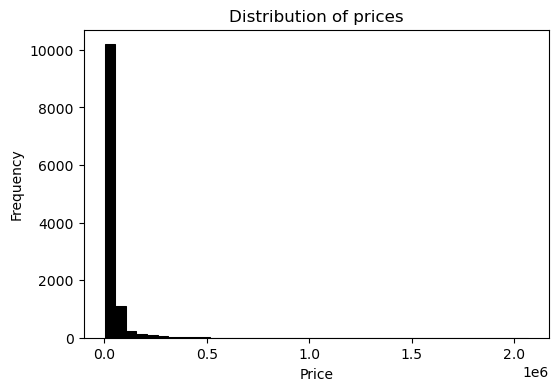

In [14]:
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp, bins=40, color='black', alpha=1)

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

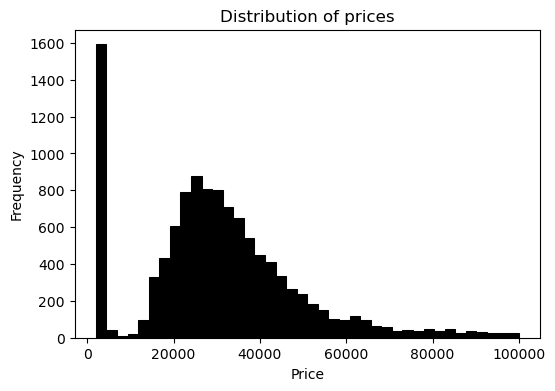

In [15]:
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp[df.msrp < 1e5], bins=40, color='black', alpha=1)

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [16]:
np.log([1, 10, 1000, 1e5])

array([ 0.        ,  2.30258509,  6.90775528, 11.51292546])

In [17]:
np.log([1, 10, 1000, 100000])

array([ 0.        ,  2.30258509,  6.90775528, 11.51292546])

In [18]:
np.log([0, 1, 10, 1000, 100000])

/tmp/ipykernel_8545/1040805571.py:1: RuntimeWarning: divide by zero encountered in log
  np.log([0, 1, 10, 1000, 100000])


array([       -inf,  0.        ,  2.30258509,  6.90775528, 11.51292546])

In [19]:
np.log([0+1, 1+1, 10+1, 1000+1, 100000+1])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [20]:
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

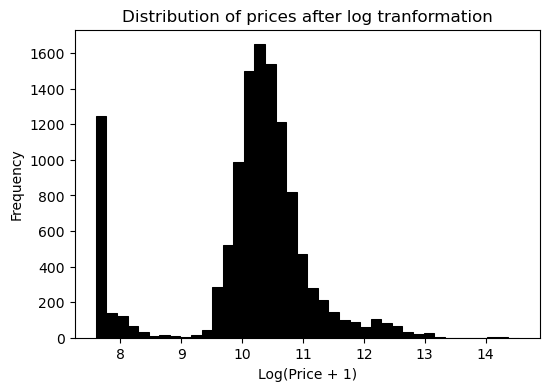

In [21]:
log_price = np.log1p(df.msrp)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [22]:
df.isnull()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11910,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11911,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11912,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# Setting up the validation framework

In [24]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [25]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [26]:
df.iloc[[0, 1, 2]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350


In [27]:
df.iloc[:5]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [28]:
df.iloc[5:10]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200
6,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,26,17,3916,44100
7,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39300
8,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,36900
9,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,27,18,3916,37200


In [29]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [30]:
np.random.seed(2)
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [31]:
df_val = df.iloc[idx[:n_val]]
df_test = df.iloc[idx[n_val:n_val+n_test]]
df_train = df.iloc[idx[n_val+n_test:]]


In [32]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
8597,kia,rondo,2008,regular_unleaded,162.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,wagon,26,19,1720,16395
6408,subaru,legacy,2016,regular_unleaded,175.0,4.0,automatic,all_wheel_drive,4.0,NaN,midsize,sedan,36,26,640,24145
11241,hyundai,veloster,2016,regular_unleaded,132.0,4.0,manual,front_wheel_drive,3.0,hatchback,compact,2dr_hatchback,35,27,1439,18000
569,fiat,500,2017,premium_unleaded_(recommended),101.0,4.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,33,27,819,15990
1659,lincoln,aviator,2005,premium_unleaded_(required),302.0,8.0,automatic,all_wheel_drive,4.0,luxury,midsize,4dr_suv,16,11,61,43585


In [33]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [34]:
np.log1p(df_train.msrp.values)

array([ 9.70479268, 10.09187401,  9.79818259, ..., 10.27852782,
       10.00789261, 10.40414162])

In [35]:
y_train = np.log1p(df_train.msrp.values)
y_test = np.log1p(df_test.msrp.values)
y_val = np.log1p(df_val.msrp.values)

del df_train['msrp']
del df_test['msrp']
del df_val['msrp']

In [36]:
len(y_train)

7150

# Linear regression

In [37]:
df_train.iloc[10]

make                        chevrolet
model                 trailblazer_ext
year                             2004
engine_fuel_type     regular_unleaded
engine_hp                       275.0
engine_cylinders                  6.0
transmission_type           automatic
driven_wheels        rear_wheel_drive
number_of_doors                   4.0
market_category                   NaN
vehicle_size                    large
vehicle_style                 4dr_suv
highway_mpg                        18
city_mpg                           13
popularity                       1385
Name: 10, dtype: object

In [38]:
xi = [120.0, 19, 1385]

In [39]:
w0 = 7.17
w1 = [0.01, 0.04, 0.002]

In [40]:
def linear_regression_simple(xi):
    n = len(xi)
    pred = w0
    for j in range(n):
        pred = pred + w1[j]*xi[j]
    return pred

In [41]:
linear_regression_simple(xi)

11.899999999999999

In [42]:
np.exp(linear_regression_simple(xi)) - 1

147265.62524055244

In [43]:
np.expm1(linear_regression_simple(xi))

147265.62524055244

In [44]:
np.log1p(np.expm1(linear_regression_simple(xi)))

11.899999999999999

# Linear regression vector form

In [45]:
def dot(xi, w):
    n = len(xi)
    res = 0.0
    for j in range(n):
        res = res + w[j]*xi[j]
    return res

In [46]:
w_new = [w0] + w1

In [47]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [48]:
def linear_regression2(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [49]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [50]:
X.dot(w_new)

array([12.38 , 13.552, 12.312])

In [51]:
def linear_regression(X):
    return X.dot(w_new)

# Training a linear regression model

In [52]:
X_org = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86]
]

X_org = np.array(X_org)
X_org

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [53]:
ones = np.ones(X_org.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [54]:
list(np.column_stack([ones, X_org]))

[array([1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03]),
 array([1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03]),
 array([  1., 453.,  11.,  86.]),
 array([  1., 158.,  24., 185.]),
 array([  1., 172.,  25., 201.]),
 array([  1., 413.,  11.,  86.]),
 array([  1.,  38.,  54., 185.]),
 array([  1., 142.,  25., 431.]),
 array([  1., 453.,  31.,  86.])]

In [55]:
X = np.column_stack([ones, X_org])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [56]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]

In [57]:
XTX = X.T.dot(X)
XTX

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 4.676000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 7.185400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.188030e+05],
       [4.676000e+03, 7.185400e+05, 1.188030e+05, 6.359986e+06]])

In [58]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

In [59]:
XTX.dot(XTX_inv)

array([[ 1.00000000e+00, -3.46944695e-18,  0.00000000e+00,
         0.00000000e+00],
       [ 1.81898940e-12,  1.00000000e+00,  0.00000000e+00,
        -4.44089210e-16],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.38777878e-17],
       [ 0.00000000e+00, -5.32907052e-15,  1.42108547e-14,
         1.00000000e+00]])

In [60]:
XTX.dot(XTX_inv).round(1)

array([[ 1., -0.,  0.,  0.],
       [ 0.,  1.,  0., -0.],
       [ 0.,  0.,  1.,  0.],
       [ 0., -0.,  0.,  1.]])

In [61]:
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 3.00067767e+02, -2.27742529e-01, -2.57694130e+00, -2.30120640e-02])

In [62]:
w0 = w_full[0]
w = w_full[1:]
w0, w

(300.06776692555593, array([-0.22774253, -2.5769413 , -0.02301206]))

In [63]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [64]:
train_linear_regression(X_org, y)

(300.06776692555593, array([-0.22774253, -2.5769413 , -0.02301206]))

# Car price baseline model

In [65]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [66]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [67]:
base = [
    'engine_hp', 
    'engine_cylinders', 
    'highway_mpg', 
    'city_mpg', 
    'popularity'
]
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,162.0,4.0,26,19,1720
1,175.0,4.0,36,26,640
2,132.0,4.0,35,27,1439
3,101.0,4.0,33,27,819
4,302.0,8.0,16,11,61
...,...,...,...,...,...
7145,200.0,6.0,18,13,1385
7146,160.0,4.0,33,29,640
7147,250.0,6.0,22,15,1851
7148,174.0,4.0,42,31,2202


In [68]:
X_train = df_train[base].values
X_train

array([[ 162.,    4.,   26.,   19., 1720.],
       [ 175.,    4.,   36.,   26.,  640.],
       [ 132.,    4.,   35.,   27., 1439.],
       ...,
       [ 250.,    6.,   22.,   15., 1851.],
       [ 174.,    4.,   42.,   31., 2202.],
       [ 256.,    6.,   27.,   20.,  640.]])

In [69]:
y_train

array([ 9.70479268, 10.09187401,  9.79818259, ..., 10.27852782,
       10.00789261, 10.40414162])

In [70]:
train_linear_regression(X_train, y_train)

(nan, array([nan, nan, nan, nan, nan]))

In [71]:
df_train[base].isnull().sum()

engine_hp           43
engine_cylinders    20
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [72]:
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [73]:
X_train = df_train[base].fillna(0)
X_train

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,162.0,4.0,26,19,1720
1,175.0,4.0,36,26,640
2,132.0,4.0,35,27,1439
3,101.0,4.0,33,27,819
4,302.0,8.0,16,11,61
...,...,...,...,...,...
7145,200.0,6.0,18,13,1385
7146,160.0,4.0,33,29,640
7147,250.0,6.0,22,15,1851
7148,174.0,4.0,42,31,2202


In [74]:
w0, w = train_linear_regression(X_train, y_train)

In [75]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

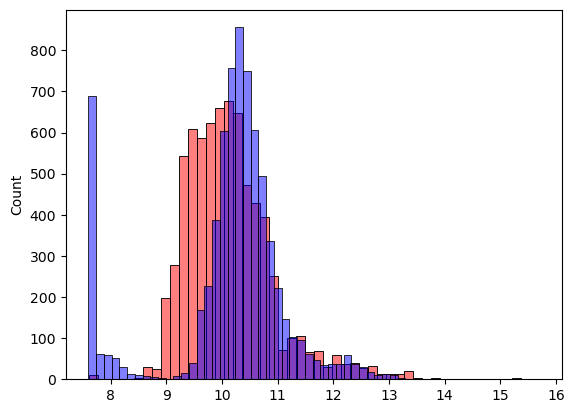

In [76]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

# RMSE

In [77]:
def rmse(y, y_pred):
    err = y - y_pred
    se = err ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [78]:
rmse(y_train, y_pred)

0.745130516822012

# Validating the model

In [79]:
base = [
    'engine_hp', 
    'engine_cylinders', 
    'highway_mpg', 
    'city_mpg', 
    'popularity'
]

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.53444531,  9.9134707 ,  9.50481225, ...,  9.95243029,
       10.04503665, 10.16325819])

In [80]:
rmse(y_train, y_pred)

0.745130516822012

In [81]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    return df_num.values

In [83]:
X_train = prepare_X(df_train)

w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.53444531,  9.9134707 ,  9.50481225, ...,  9.95243029,
       10.04503665, 10.16325819])

In [84]:
X_val = prepare_X(df_val)
y_pred = w0 +X_val.dot(w)
rmse(y_val, y_pred)

0.7419381478118975

# Simple feature engineering

In [86]:
df_train.year.max()

2017

In [88]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    return df_num.values

In [92]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.43577869, 10.32168764, 10.13582219, ...,  9.69755834,
       10.28251487, 10.64729594])

In [94]:
y_pred = w0 +X_train.dot(w)
rmse(y_train, y_pred)

0.5138817849020834

<Axes: ylabel='Count'>

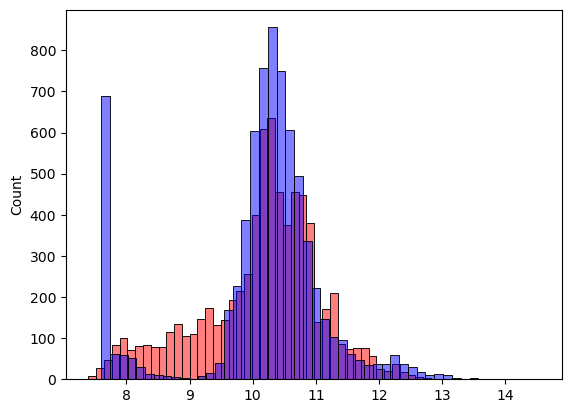

In [95]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

# Categorical variables

In [97]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [98]:
df_train.number_of_doors == 2

0       False
1       False
2       False
3        True
4       False
        ...  
7145    False
7146    False
7147    False
7148    False
7149    False
Name: number_of_doors, Length: 7150, dtype: bool

In [99]:
(df_train.number_of_doors == 2).astype('int')

0       0
1       0
2       0
3       1
4       0
       ..
7145    0
7146    0
7147    0
7148    0
7149    0
Name: number_of_doors, Length: 7150, dtype: int64

In [101]:
for v in [2, 3, 4]:
    df_train[f"num_doors_{v}"] = (df_train.number_of_doors == v).astype('int')

In [102]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'num_doors_2', 'num_doors_3',
       'num_doors_4'],
      dtype='object')

In [104]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        df[f"num_doors_{v}"] = (df.number_of_doors == v).astype('int')
        features.append(f"num_doors_{v}")

    df_num = df[features]
    df_num = df_num.fillna(0)
    
    return df_num.values

In [105]:
prepare_X(df_train)

array([[162.,   4.,  26., ...,   0.,   0.,   1.],
       [175.,   4.,  36., ...,   0.,   0.,   1.],
       [132.,   4.,  35., ...,   0.,   1.,   0.],
       ...,
       [250.,   6.,  22., ...,   0.,   0.,   1.],
       [174.,   4.,  42., ...,   0.,   0.,   1.],
       [256.,   6.,  27., ...,   0.,   0.,   1.]])

In [111]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)
rmse(y_train, y_pred)

0.5119486369713488

<Axes: ylabel='Count'>

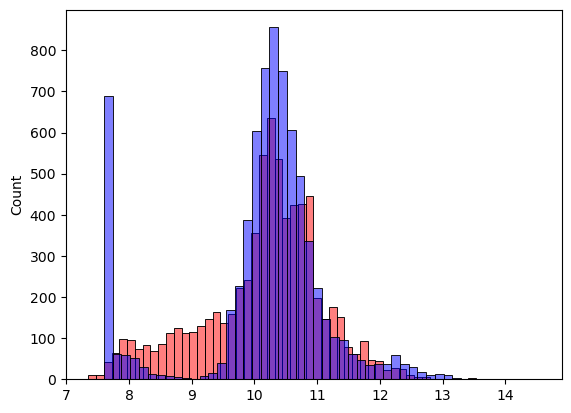

In [112]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [107]:
X_val = prepare_X(df_val)
y_pred = w0 +X_val.dot(w)
rmse(y_val, y_pred)

0.5210137656826076

In [114]:
df.make.nunique()

48

In [115]:
df.make.value_counts().head()

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

In [116]:
df.make.value_counts().head().index

Index(['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'], dtype='object')

In [117]:
list(df.make.value_counts().head().index)

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [118]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        df[f"num_doors_{v}"] = (df.number_of_doors == v).astype('int')
        features.append(f"num_doors_{v}")
    
    makes = list(df.make.value_counts().head().index)
    for v in makes:
        df[f"make_{v}"] = (df.make == v).astype('int')
        features.append(f"make_{v}")

    df_num = df[features]
    df_num = df_num.fillna(0)
    
    return df_num.values

In [119]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)
rmse(y_train, y_pred)

0.5030541378282043

<Axes: ylabel='Count'>

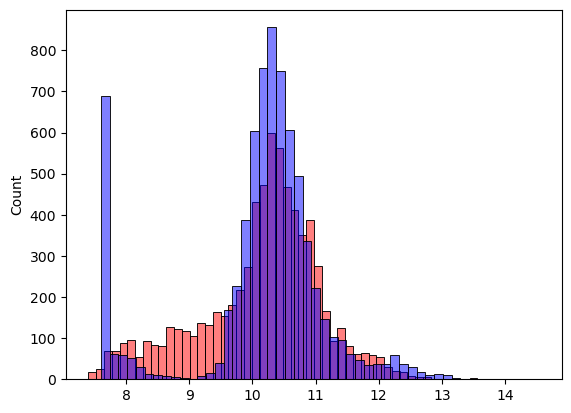

In [120]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [121]:
X_val = prepare_X(df_val)
y_pred = w0 +X_val.dot(w)
rmse(y_val, y_pred)

0.5104686484233132

In [127]:
list(df.dtypes[df.dtypes == object].index)

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [128]:
categorical_variables = ['make',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [129]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)
    

In [130]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [131]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        df[f"num_doors_{v}"] = (df.number_of_doors == v).astype('int')
        features.append(f"num_doors_{v}")
    
    for c, values in categories.items():
        for v in values:
            df[f"{c}_{v}"] = (df[c] == v).astype('int')
            features.append(f"{c}_{v}")

    df_num = df[features]
    df_num = df_num.fillna(0)
    
    return df_num.values

160.41145673138126


<Axes: ylabel='Count'>

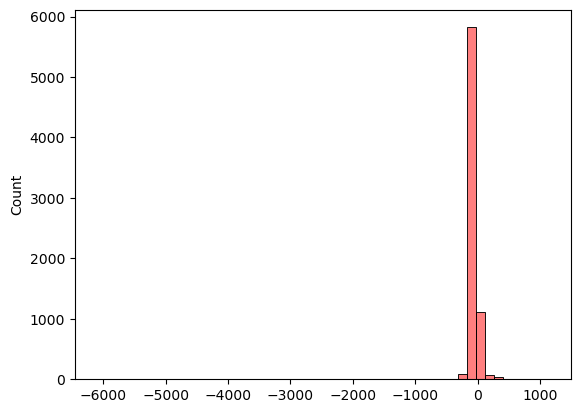

In [132]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)
print(rmse(y_train, y_pred))

sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [134]:
w0 # huge

1.0109800951978272e+16

In [135]:
w

array([ 1.46319691e-01,  3.26386616e+01,  3.91726657e+00,  1.17333196e+01,
        1.47920864e-03,  4.44292256e+00,  6.04757580e+03,  6.08731309e+03,
        6.05100290e+03, -1.36723630e+00, -2.64483293e+00,  2.41587533e+01,
       -2.58827686e+01,  9.01372530e+00,  2.62538278e+01,  1.92788277e+01,
        1.04417812e+01,  6.53914666e+01, -6.33755368e+01, -8.07702960e+15,
       -8.07702960e+15, -8.07702960e+15, -8.07702960e+15, -8.07702960e+15,
       -2.03277135e+15, -2.03277135e+15, -2.03277135e+15, -2.03277135e+15,
        7.89581945e-01, -9.73188226e-01, -5.46000723e+00, -4.69050046e+00,
       -9.25448271e+01,  1.40303678e+01, -2.77884570e+00,  1.18674681e+01,
       -5.23253992e-02,  5.54593778e-02,  1.74932828e-01,  3.02782777e-01,
       -1.37794157e-01])

# Regularization

Sometimes inverses do not exist because of multiple columns describing the same feature.

In [137]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5]
]

X = np.array(X)
X

array([[4, 4, 4],
       [3, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [4, 5, 5]])

In [139]:
XTX = X.T.dot(X)
XTX

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

In [140]:
np.linalg.inv(XTX)

LinAlgError: Singular matrix

In [141]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001]
]

X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [145]:
y = [1, 2, 3, 1, 2, 3]

In [142]:
XTX = X.T.dot(X)
XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

In [144]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.86409478e-02, -1.26839821e+05,  1.26839770e+05],
       [-1.26839767e+05,  2.88638033e+14, -2.88638033e+14],
       [ 1.26839727e+05, -2.88638033e+14,  2.88638033e+14]])

In [146]:
XTX_inv.dot(X.T).dot(y)

array([-1.93908875e-01, -3.61854375e+06,  3.61854643e+06])

We can add a small number to the diagonal to avoid singularity

In [149]:
XTX = [
    [1,2,2],
    [2,1,1.000001],
    [2,1.000001,1]
]

XTX = np.array(XTX)
np.linalg.inv(XTX)

array([[-3.33333556e-01,  3.33333389e-01,  3.33333389e-01],
       [ 3.33333389e-01, -5.00000083e+05,  4.99999917e+05],
       [ 3.33333389e-01,  4.99999917e+05, -5.00000083e+05]])

In [150]:
XTX = [
    [1 + 0.001, 2, 2],
    [2, 1 + 0.001, 1.000001],
    [2, 1.000001, 1 + 0.001]
]

XTX = np.array(XTX)
np.linalg.inv(XTX)

array([[-3.33667112e-01,  3.33500195e-01,  3.33500195e-01],
       [ 3.33500195e-01,  5.00417042e+02, -5.00583959e+02],
       [ 3.33500195e-01, -5.00583959e+02,  5.00417042e+02]])

In [151]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [154]:
XTX = XTX + 0.01 * np.eye(3)
XTX

array([[1.011   , 2.      , 2.      ],
       [2.      , 1.011   , 1.000001],
       [2.      , 1.000001, 1.011   ]])

In [155]:
np.linalg.inv(XTX)

array([[ -0.33702734,   0.33518366,   0.33518366],
       [  0.33518366,  45.37396039, -45.54339573],
       [  0.33518366, -45.54339573,  45.37396039]])

In [156]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

0.4520104100644161


<Axes: ylabel='Count'>

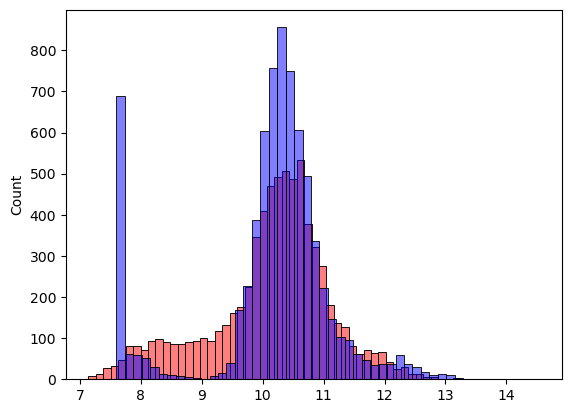

In [165]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)
y_pred = w0 + X_train.dot(w)
print(rmse(y_train, y_pred))

sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

# Tuning the model

In [168]:
for r in [0.0, 1e-5, 1e-4, 1e-3, 1e-1, 1, 10]:
    
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
    X_val = prepare_X(df_val)
    y_pred = w0 +X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)


0.0 1.0109800951978272e+16 202.8756595769932
1e-05 -1.8758113430438197 0.4687170737218733
0.0001 6.159410719422506 0.4687170463547691
0.001 6.310020115666133 0.4687168633843558
0.1 6.152066538710972 0.46875265040962866
1 5.454208407884888 0.470135782915561
10 4.232200708816791 0.4817549149185293


0.452010020589969


<Axes: ylabel='Count'>

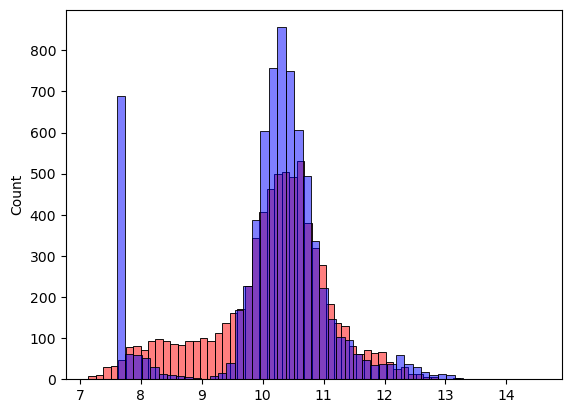

In [171]:
r = 0.001

X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

y_pred = w0 + X_train.dot(w)
print(rmse(y_train, y_pred))

sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

# Using the model

In [172]:
df_full_train = pd.concat([df_train, df_val])
df_full_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,kia,rondo,2008,regular_unleaded,162.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,wagon,26,19,1720,0.0,0.0,1.0
1,subaru,legacy,2016,regular_unleaded,175.0,4.0,automatic,all_wheel_drive,4.0,NaN,midsize,sedan,36,26,640,0.0,0.0,1.0
2,hyundai,veloster,2016,regular_unleaded,132.0,4.0,manual,front_wheel_drive,3.0,hatchback,compact,2dr_hatchback,35,27,1439,0.0,1.0,0.0
3,fiat,500,2017,premium_unleaded_(recommended),101.0,4.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,33,27,819,1.0,0.0,0.0
4,lincoln,aviator,2005,premium_unleaded_(required),302.0,8.0,automatic,all_wheel_drive,4.0,luxury,midsize,4dr_suv,16,11,61,0.0,0.0,1.0


In [173]:
df_full_train = df_full_train.reset_index(drop=True)

In [174]:
X_full_train = prepare_X(df_full_train)
X_full_train

array([[162.,   4.,  26., ...,   0.,   0.,   0.],
       [175.,   4.,  36., ...,   0.,   0.,   0.],
       [132.,   4.,  35., ...,   0.,   0.,   0.],
       ...,
       [197.,   4.,  32., ...,   0.,   0.,   1.],
       [302.,   6.,  28., ...,   0.,   0.,   0.],
       [210.,   6.,  20., ...,   0.,   0.,   0.]])

In [177]:
y_full_train = np.concatenate([y_train, y_val])

In [178]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
w0, w

(6.31105911733146,
 array([ 1.58188094e-03,  1.16747160e-01, -6.84023562e-03, -5.82599747e-03,
        -5.69435269e-05, -9.55822860e-02, -7.42403725e-01, -8.56561183e-01,
        -6.01290831e-01, -4.19678144e-02,  2.15418103e-01, -2.56301781e-03,
        -8.85582686e-02, -9.20751821e-02, -4.55974042e-01,  9.17938057e-02,
        -3.11753501e-01, -5.42846528e-01, -6.28217329e-02,  1.07744486e+00,
         8.78187742e-01,  1.14104521e+00,  2.72387734e+00,  4.94349823e-01,
         1.63412409e+00,  1.51882132e+00,  1.61934777e+00,  1.53883744e+00,
        -9.79876848e-02,  4.48085970e-02, -3.80637743e-02, -1.69804550e-03,
        -2.68515975e-02,  2.18858897e+00,  2.06930488e+00,  2.05370690e+00,
        -3.81749937e-02,  5.13487268e-02,  1.81786907e-01,  3.25308259e-01,
        -1.36989420e-01]))

In [180]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.4642458059635319

In [181]:
df_test.iloc[20]

make                                          acura
model                                           ilx
year                                           2017
engine_fuel_type     premium_unleaded_(recommended)
engine_hp                                     201.0
engine_cylinders                                4.0
transmission_type                  automated_manual
driven_wheels                     front_wheel_drive
number_of_doors                                 4.0
market_category                              luxury
vehicle_size                                compact
vehicle_style                                 sedan
highway_mpg                                      35
city_mpg                                         25
popularity                                      204
Name: 20, dtype: object

In [183]:
car = df_test.iloc[20].to_dict()
car

{'make': 'acura',
 'model': 'ilx',
 'year': 2017,
 'engine_fuel_type': 'premium_unleaded_(recommended)',
 'engine_hp': 201.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'automated_manual',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'luxury',
 'vehicle_size': 'compact',
 'vehicle_style': 'sedan',
 'highway_mpg': 35,
 'city_mpg': 25,
 'popularity': 204}

In [185]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,acura,ilx,2017,premium_unleaded_(recommended),201.0,4.0,automated_manual,front_wheel_drive,4.0,luxury,compact,sedan,35,25,204


In [187]:
X_small = prepare_X(df_small)

In [188]:
y_pred = w0 + X_small.dot(w)
y_pred

array([10.67380633])

In [189]:
np.expm1(y_pred[0])

43208.096847403736

In [190]:
y_test[20]

10.285035580584145

In [191]:
np.expm1(y_test[20])

29289.999999999978